In [39]:
import gym
import matplotlib.pyplot as plt
import numpy as np

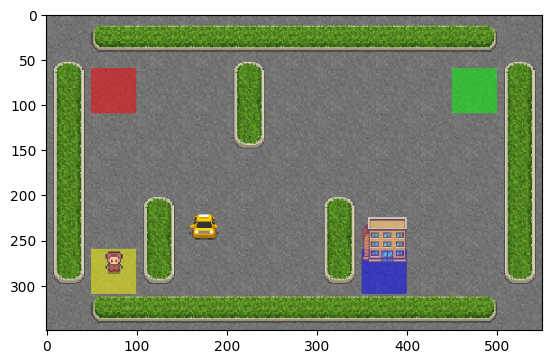

Action Space Discrete(6)
State Space Discrete(500)


In [13]:
# 生成环境
env = gym.make('Taxi-v3', render_mode="rgb_array")
# 环境初始化
state = env.reset()
pic = env.render()
plt.imshow(pic)
plt.show()
print("Action Space {}".format(env.action_space))
print("State Space {}".format(env.observation_space))
env.close()

In [37]:
env = gym.make('Taxi-v3', render_mode="rgb_array")
# 环境初始化
state = env.reset()
state = env.encode(3, 1, 2, 0) # (taxi row, taxi column, passenger index, destination index)
print("State:", state)
print(env.P[328])

env.close()

State: 328
{0: [(1.0, 428, -1, False)], 1: [(1.0, 228, -1, False)], 2: [(1.0, 348, -1, False)], 3: [(1.0, 328, -1, False)], 4: [(1.0, 328, -10, False)], 5: [(1.0, 328, -10, False)]}


In [53]:
env = gym.make('Taxi-v3', render_mode="rgb_array_list")
env.reset()
frame = []
state_list = []
reward_list  = []
# 循环交互
for _ in range(6):
    # 从动作空间随机获取一个动作
    action = env.action_space.sample()

    # agent与环境进行一步交互
    state, reward, terminated, truncated, info = env.step(action)
    # print('state = {0}; reward = {1}'.format(state, reward))
    state_list.append(state)
    reward_list.append(reward)
    # 判断当前否完成
    if terminated:
        print('done')
        break
    # time.sleep(1)

frame.append(env.render())
# 环境结束
env.close()

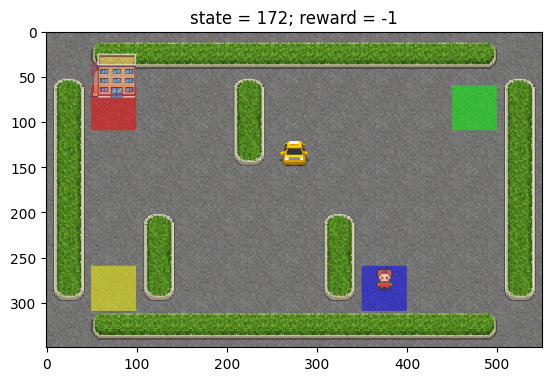

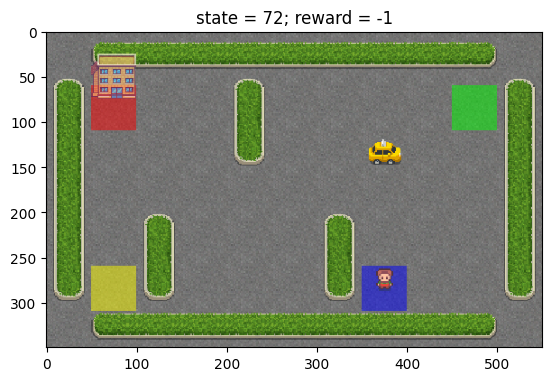

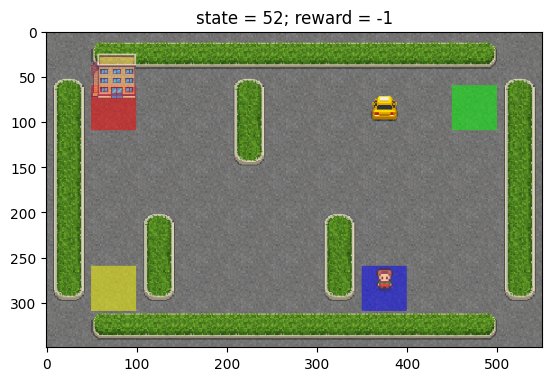

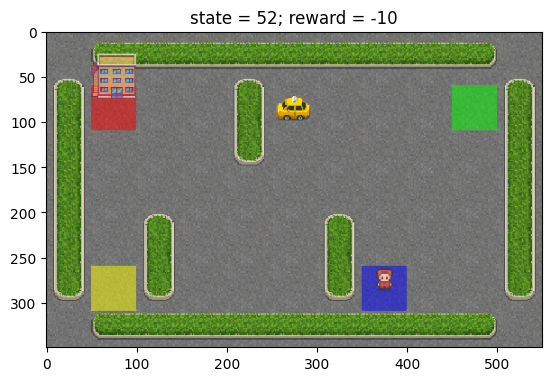

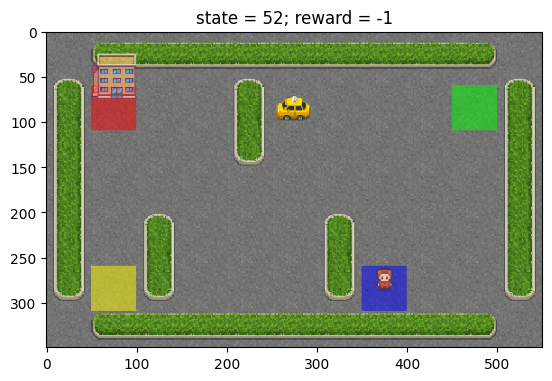

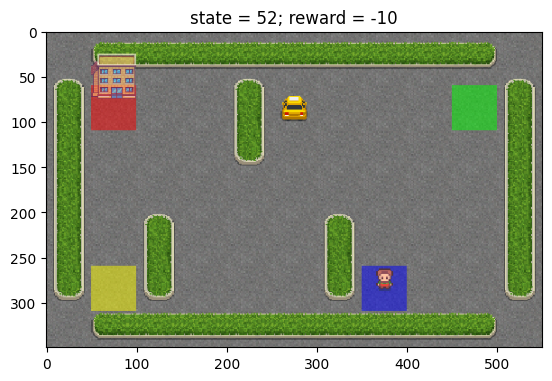

In [54]:
frames = np.array(frame)
frames = frames.squeeze()
for i in range(len(state_list)):
    plt.imshow(frames[i])
    plt.title('state = {0}; reward = {1}'.format(state_list[i], reward_list[i]))
    plt.show()

In [6]:
from matplotlib.animation import FuncAnimation
from PIL import Image

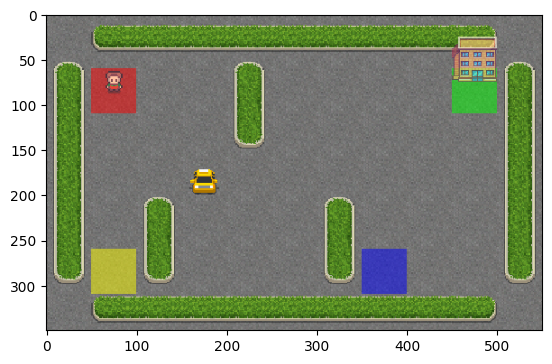

In [40]:
# 创建一个空白的图像窗口
fig, ax = plt.subplots()

# 初始化图像对象
im = ax.imshow(frames[0])  # 显示第一帧

# 更新函数，用于更新图像内容
def update(frame):
    im.set_array(frame)  # 更新图像内容
    return im,

# 创建动画对象
ani = FuncAnimation(fig, update, frames=frames, interval=100)

# 显示动画
plt.show()


In [14]:
import imageio
def compose_gif(frame):
    imageio.mimsave("gym_Taxi.gif", frames, duration=20)

compose_gif(frame)